In [124]:
import json
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
%matplotlib inline

import seaborn as sns

In [104]:
# Customize matplotlib appearance
sns.set_style("white", {'axes.grid': False, 'grid.color': '.9', 'grid.linestyle': u'--'})

matplotlib.rc('axes', titlesize=20, labelsize=18)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('lines', markersize=8)

matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'size': 14})

## Figure 1

In [9]:
with open("../UCI-demo/results.json") as fp:
    results = json.load(fp)
with open("../UCI-demo/baselines.json") as fp:
    baselines = json.load(fp)

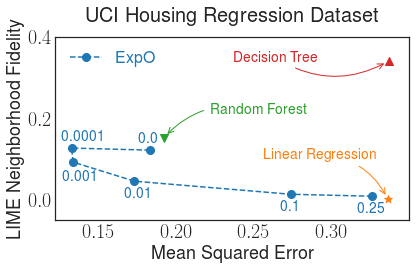

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Colors and markers
colors = sns.color_palette()
markers = ["^", "v", "*"]

# Plot ExpO
regs = list(results.keys())
x = [results[key][0] for key in results.keys()]
y = [results[key][1] for key in results.keys()]
ax.plot(x, y, "--", marker="o")
ax.set_ylim([-0.05, 0.4])
ax.annotate(
    regs[0], color=colors[0],
    xy=(x[0], y[0]), xycoords='data',
    xytext=(x[0]-0.008, y[0]+0.02), textcoords='data')
ax.annotate(
    regs[1], color=colors[0],
    xy=(x[1], y[1]), xycoords='data',
    xytext=(x[1]-0.007, y[1]+0.02), textcoords='data')
ax.annotate(
    regs[2], color=colors[0],
    xy=(x[2], y[2]), xycoords='data',
    xytext=(x[2]-0.007, y[2]-0.045), textcoords='data')
ax.annotate(
    regs[3], color=colors[0],
    xy=(x[3], y[3]), xycoords='data',
    xytext=(x[3]-0.007, y[3]-0.04), textcoords='data')
ax.annotate(
    regs[4], color=colors[0],
    xy=(x[4], y[4]), xycoords='data',
    xytext=(x[4]-0.007, y[4]-0.04), textcoords='data')
ax.annotate(
    regs[5], color=colors[0],
    xy=(x[5], y[5]), xycoords='data',
    xytext=(x[5]-0.01, y[5]-0.04), textcoords='data')

# Add baselines
x = [baselines[key][0] for key in baselines.keys()]
y = [baselines[key][1] for key in baselines.keys()]
ax.scatter([x[0]], [y[0]], c=[colors[1]], marker="*")
ax.scatter([x[1]], [y[1]], c=[colors[2]], marker="v")
ax.scatter([x[2]], [y[2]], c=[colors[3]], marker="^")
ax.annotate(
    "Linear Regression", color=colors[1],
    xy=(x[0], y[0]), xycoords='data',
    xytext=(x[0]-0.08, y[0]+0.1), textcoords='data',
    arrowprops=dict(
        arrowstyle="->", color=colors[1],
        shrinkA=5, shrinkB=5,
        connectionstyle="arc3,rad=-0.3"),
)
ax.annotate(
    "Random Forest", color=colors[2],
    xy=(x[1], y[1]), xycoords='data',
    xytext=(x[1]+0.03, y[1]+0.06), textcoords='data',
    arrowprops=dict(
        arrowstyle="->", color=colors[2],
        shrinkA=5, shrinkB=5,
        connectionstyle="arc3,rad=0.3"),
)
ax.annotate(
    "Decision Tree", color=colors[3],
    xy=(x[2], y[2]), xycoords='data',
    xytext=(x[2]-0.1, y[2]), textcoords='data',
    arrowprops=dict(
        arrowstyle="->", color=colors[3],
        shrinkA=5, shrinkB=5,
        connectionstyle="arc3,rad=0.3"),
)

# Legend
legend = plt.legend(["ExpO"], frameon=False)
plt.setp(legend.get_texts(), color=colors[0])

# Labels
ax.set_title("UCI Housing Regression Dataset", y=1.05)
ax.set_xlabel("Mean Squared Error")
ax.set_ylabel("LIME Neighborhood Fidelity")


fig.tight_layout()
fig.savefig("lime-nf-vs-mse-uci-housing.pdf")

## Figure 4

In [126]:
results = pd.read_csv("../UCI-demo2/results.csv")

In [153]:
# Unpack results
values = dict()
for name in ["lime", "mse", "weight_reg"]:
    values[name] = {
        stddev_eval: np.asarray([
            results[results["stddev_eval"] == stddev_eval][results["stddev_reg"] == stddev_reg][name].values + 1e-7
            for stddev_reg in [0.1, 0.25, 0.5]
        ]).T
        for stddev_eval in [0.1, 0.25, 0.5]
    }

/usr/local/var/pyenv/versions/3.6.3/envs/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


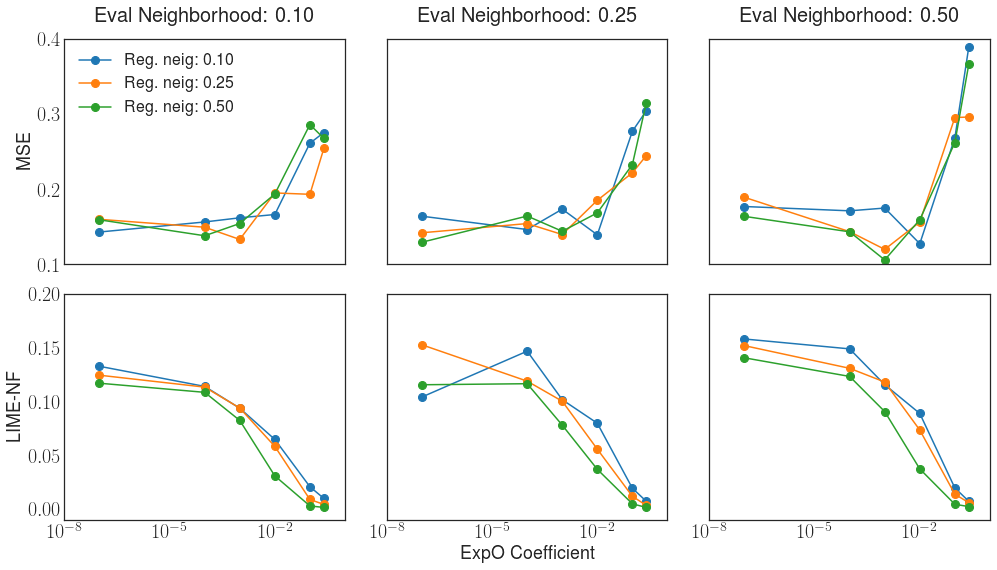

In [193]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(14, 8))

ax = ax1
ax.plot(values["weight_reg"][0.1], values["mse"][0.1], "-", marker="o")
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_title("Eval Neighborhood: 0.10", y=1.05)
ax.set_xticklabels([])
ax.set_ylim([0.1, 0.4])
ax.set_xlim([1e-8, 1e0])
ax.legend(["Reg. neig: 0.10", "Reg. neig: 0.25", "Reg. neig: 0.50"], loc=2)

ax = ax2
ax.plot(values["weight_reg"][0.25], values["mse"][0.25], "-", marker="o")
ax.set_xscale("log")
ax.set_title("Eval Neighborhood: 0.25", y=1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim([0.1, 0.4])
ax.set_xlim([1e-8, 1e0])

ax = ax3
ax.plot(values["weight_reg"][0.5], values["mse"][0.5], "-", marker="o")
ax.set_xscale("log")
ax.set_title("Eval Neighborhood: 0.50", y=1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim([0.1, 0.4])
ax.set_xlim([1e-8, 1e0])

ax = ax4
ax.plot(values["weight_reg"][0.1], values["lime"][0.1], "-", marker="o")
ax.set_xscale("log")
ax.set_ylabel("LIME-NF")
ax.set_xlim([1e-8, 1e0])
ax.set_ylim([-0.01, 0.2])

ax = ax5
ax.plot(values["weight_reg"][0.25], values["lime"][0.25], "-", marker="o")
ax.set_xscale("log")
ax.set_xlabel("ExpO Coefficient")
ax.set_yticklabels([])
ax.set_xlim([1e-8, 1e0])
ax.set_ylim([-0.01, 0.2])

ax = ax6
ax.plot(values["weight_reg"][0.5], values["lime"][0.5], "-", marker="o")
ax.set_xscale("log")
ax.set_yticklabels([])
ax.set_xlim([1e-8, 1e0])
ax.set_ylim([-0.01, 0.2])

fig.tight_layout()
fig.savefig("metrics-for-diff-neighborhoods.pdf")